In [522]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

# Tentang Dataset
https://www.kaggle.com/datasets/alicemtopcu/top-1500-games-on-steam-by-revenue-09-09-2024

## 1. Preparing Data

In [525]:
df = pd.read_csv('Steam_2024_bestRevenue_1500.csv')
df.head()

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830


## 2. Clearing Data

In [527]:
df.head()

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830


In [528]:
df.isna().sum()

name              0
releaseDate       0
copiesSold        0
price             0
revenue           0
avgPlaytime       0
reviewScore       0
publisherClass    0
publishers        1
developers        2
steamId           0
dtype: int64

In [529]:
df.dropna(inplace=True)

In [530]:
df.isna().sum()

name              0
releaseDate       0
copiesSold        0
price             0
revenue           0
avgPlaytime       0
reviewScore       0
publisherClass    0
publishers        0
developers        0
steamId           0
dtype: int64

In [531]:
df.duplicated().sum()

0

In [532]:
len(df)

1497

In [533]:
df.nunique()

name              1497
releaseDate        235
copiesSold        1457
price               58
revenue           1494
avgPlaytime       1497
reviewScore         72
publisherClass       3
publishers        1131
developers        1405
steamId           1497
dtype: int64

## 3. Feature Engineering

In [535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1497 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1497 non-null   object 
 1   releaseDate     1497 non-null   object 
 2   copiesSold      1497 non-null   int64  
 3   price           1497 non-null   float64
 4   revenue         1497 non-null   float64
 5   avgPlaytime     1497 non-null   float64
 6   reviewScore     1497 non-null   int64  
 7   publisherClass  1497 non-null   object 
 8   publishers      1497 non-null   object 
 9   developers      1497 non-null   object 
 10  steamId         1497 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 140.3+ KB


#### Buat salinan data

In [537]:
df_tmp = df.copy()

In [538]:
df_tmp['releaseDate'] = pd.to_datetime(df_tmp['releaseDate'],format='%d-%m-%Y')
df_tmp.head()

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,2024-03-07,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,2024-07-25,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,2024-08-15,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,2024-06-14,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,2024-06-13,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830


In [539]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1497 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            1497 non-null   object        
 1   releaseDate     1497 non-null   datetime64[ns]
 2   copiesSold      1497 non-null   int64         
 3   price           1497 non-null   float64       
 4   revenue         1497 non-null   float64       
 5   avgPlaytime     1497 non-null   float64       
 6   reviewScore     1497 non-null   int64         
 7   publisherClass  1497 non-null   object        
 8   publishers      1497 non-null   object        
 9   developers      1497 non-null   object        
 10  steamId         1497 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 140.3+ KB


In [540]:
df_tmp = df_tmp.sort_values('releaseDate', ascending=True).reset_index()
df_tmp.head()

,index,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,119,Shipwrecked 64,2024-01-01,26225,7.99,202048.0,7.407743,96,Indie,Cogware Games,"Squeaks D'Corgeh,Cogware Games",2160220
1,503,Mothers and Daughters,2024-01-02,7578,9.99,64494.0,4.364727,67,Indie,Spin256,Spin256,2508400
2,1399,Alex Jones: NWO Wars,2024-01-03,20806,17.76,323316.0,1.366906,94,Indie,NWO Wars Team,NWO Wars Team,2487350
3,940,Akai Onna,2024-01-04,12475,2.99,28485.0,0.692439,89,Indie,Yamoto,Yamoto,2674190
4,996,TRAMCITY HAKODATE,2024-01-04,1888,14.99,25471.0,2.946588,100,Indie,TRAMWORKS,TRAMWORKS,2614000


In [541]:
# Temukan tanggal maksimum di kolom release_date
max_date = df_tmp['releaseDate'].max()

# Hitung selisih hari antara max_date dan release_date
df_tmp['days_since_max_release'] = (max_date - df_tmp['releaseDate']).dt.days

In [542]:
df_tmp.head()

,index,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId,days_since_max_release
0,119,Shipwrecked 64,2024-01-01,26225,7.99,202048.0,7.407743,96,Indie,Cogware Games,"Squeaks D'Corgeh,Cogware Games",2160220,249
1,503,Mothers and Daughters,2024-01-02,7578,9.99,64494.0,4.364727,67,Indie,Spin256,Spin256,2508400,248
2,1399,Alex Jones: NWO Wars,2024-01-03,20806,17.76,323316.0,1.366906,94,Indie,NWO Wars Team,NWO Wars Team,2487350,247
3,940,Akai Onna,2024-01-04,12475,2.99,28485.0,0.692439,89,Indie,Yamoto,Yamoto,2674190,246
4,996,TRAMCITY HAKODATE,2024-01-04,1888,14.99,25471.0,2.946588,100,Indie,TRAMWORKS,TRAMWORKS,2614000,246


In [543]:
max_date

Timestamp('2024-09-06 00:00:00')

In [544]:
df_tmp.describe()

,index,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,steamId,days_since_max_release
count,1497.000000,1497,1.497000e+03,1497.000000,1.497000e+03,1497.000000,1497.000000,1.497000e+03,1497.00000
mean,749.587174,2024-05-05 02:19:28.737474560,1.417444e+05,17.531263,2.637561e+06,12.580062,76.205745,2.184222e+06,123.90314
min,0.000000,2024-01-01 00:00:00,5.930000e+02,0.000000,2.067400e+04,0.000000,0.000000,2.488000e+04,0.00000
25%,374.000000,2024-03-07 00:00:00,4.922000e+03,9.990000,4.551800e+04,3.571454,72.000000,1.793090e+06,71.00000
50%,750.000000,2024-05-02 00:00:00,1.197200e+04,14.990000,1.099730e+05,6.763299,83.000000,2.321880e+06,127.00000
75%,1125.000000,2024-06-27 00:00:00,3.831300e+04,19.990000,4.571630e+05,13.108251,92.000000,2.693730e+06,183.00000
max,1499.000000,2024-09-06 00:00:00,3.073915e+07,99.990000,8.377934e+08,296.332852,100.000000,3.107330e+06,249.00000
std,433.580973,NaN,1.133877e+06,12.649514,2.783787e+07,21.559777,24.342595,6.060862e+05,68.07320


In [545]:
# Tentukan apakah game tersebut baru atau tidak
df_tmp['is_new'] = df_tmp['days_since_max_release'].apply(lambda x: 'New' if x <= 30 else 'Old')

In [546]:
df_tmp.head()

,index,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId,days_since_max_release,is_new
0,119,Shipwrecked 64,2024-01-01,26225,7.99,202048.0,7.407743,96,Indie,Cogware Games,"Squeaks D'Corgeh,Cogware Games",2160220,249,Old
1,503,Mothers and Daughters,2024-01-02,7578,9.99,64494.0,4.364727,67,Indie,Spin256,Spin256,2508400,248,Old
2,1399,Alex Jones: NWO Wars,2024-01-03,20806,17.76,323316.0,1.366906,94,Indie,NWO Wars Team,NWO Wars Team,2487350,247,Old
3,940,Akai Onna,2024-01-04,12475,2.99,28485.0,0.692439,89,Indie,Yamoto,Yamoto,2674190,246,Old
4,996,TRAMCITY HAKODATE,2024-01-04,1888,14.99,25471.0,2.946588,100,Indie,TRAMWORKS,TRAMWORKS,2614000,246,Old


#### Kita bisa hapus colom `releaseDate` karena data sudah tidak dipakai lagi

In [548]:
df_tmp.drop('steamId', axis=1, inplace=True)

In [549]:
df_tmp.drop('index', axis=1, inplace=True)

In [550]:
df_tmp.drop('releaseDate', axis=1, inplace=True)
df_tmp.head()

,name,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,days_since_max_release,is_new
0,Shipwrecked 64,26225,7.99,202048.0,7.407743,96,Indie,Cogware Games,"Squeaks D'Corgeh,Cogware Games",249,Old
1,Mothers and Daughters,7578,9.99,64494.0,4.364727,67,Indie,Spin256,Spin256,248,Old
2,Alex Jones: NWO Wars,20806,17.76,323316.0,1.366906,94,Indie,NWO Wars Team,NWO Wars Team,247,Old
3,Akai Onna,12475,2.99,28485.0,0.692439,89,Indie,Yamoto,Yamoto,246,Old
4,TRAMCITY HAKODATE,1888,14.99,25471.0,2.946588,100,Indie,TRAMWORKS,TRAMWORKS,246,Old


## 4. EDA

In [552]:
df_tmp.nunique()

name                      1497
copiesSold                1457
price                       58
revenue                   1494
avgPlaytime               1497
reviewScore                 72
publisherClass               3
publishers                1131
developers                1405
days_since_max_release     235
is_new                       2
dtype: int64

In [553]:
play_time_rates = pd.DataFrame(df_tmp.groupby("is_new")["price"].mean().reset_index())
play_time_rates

,is_new,price
0,New,19.724695
1,Old,17.261403


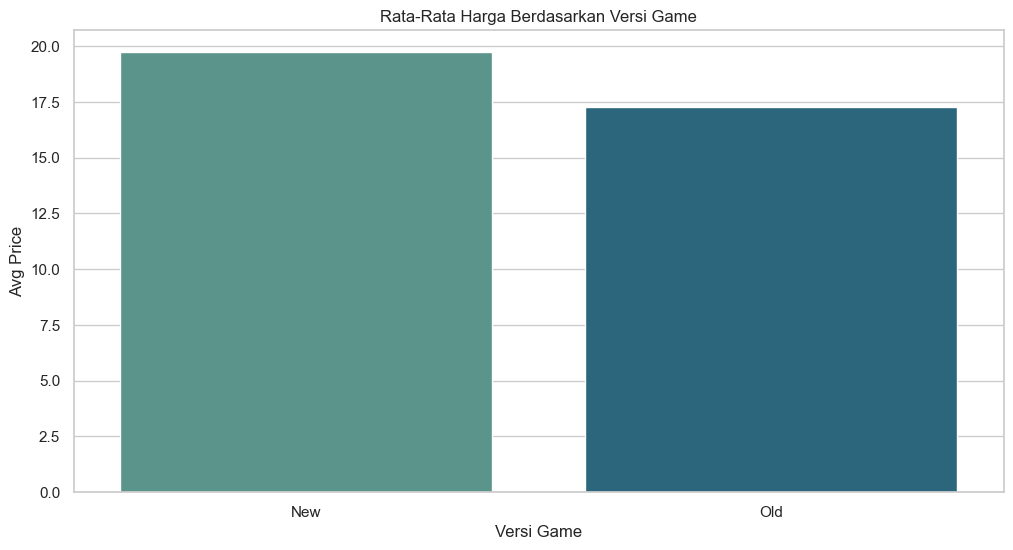

In [554]:
plt.figure(figsize=(12,6))
sns.barplot(x='is_new', y='price', data=play_time_rates, hue='is_new', palette='crest')
plt.title('Rata-Rata Harga Berdasarkan Versi Game')
plt.xlabel('Versi Game')
plt.ylabel('Avg Price')
plt.show()

In [555]:
top_publisher = pd.DataFrame(df.publisherClass.value_counts().reset_index())
top_publisher

,publisherClass,count
0,Indie,1299
1,AA,146
2,AAA,52


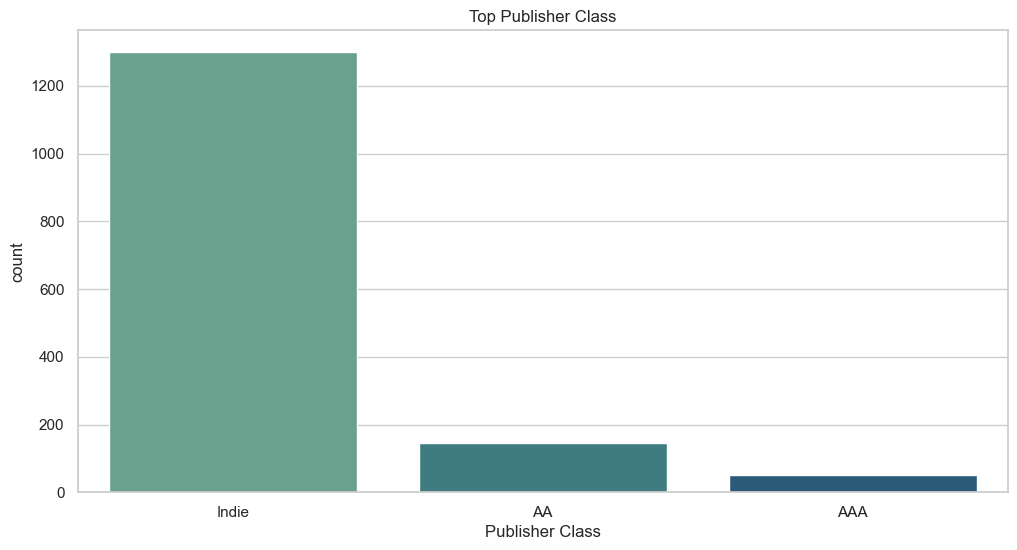

In [556]:
plt.figure(figsize=(12,6))
sns.barplot(x='publisherClass', y='count', data=top_publisher, hue='publisherClass', palette='crest')
plt.title('Top Publisher Class')
plt.xlabel('Publisher Class')
plt.ylabel('count')
plt.show()

In [557]:
df_tmp.head()

,name,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,days_since_max_release,is_new
0,Shipwrecked 64,26225,7.99,202048.0,7.407743,96,Indie,Cogware Games,"Squeaks D'Corgeh,Cogware Games",249,Old
1,Mothers and Daughters,7578,9.99,64494.0,4.364727,67,Indie,Spin256,Spin256,248,Old
2,Alex Jones: NWO Wars,20806,17.76,323316.0,1.366906,94,Indie,NWO Wars Team,NWO Wars Team,247,Old
3,Akai Onna,12475,2.99,28485.0,0.692439,89,Indie,Yamoto,Yamoto,246,Old
4,TRAMCITY HAKODATE,1888,14.99,25471.0,2.946588,100,Indie,TRAMWORKS,TRAMWORKS,246,Old


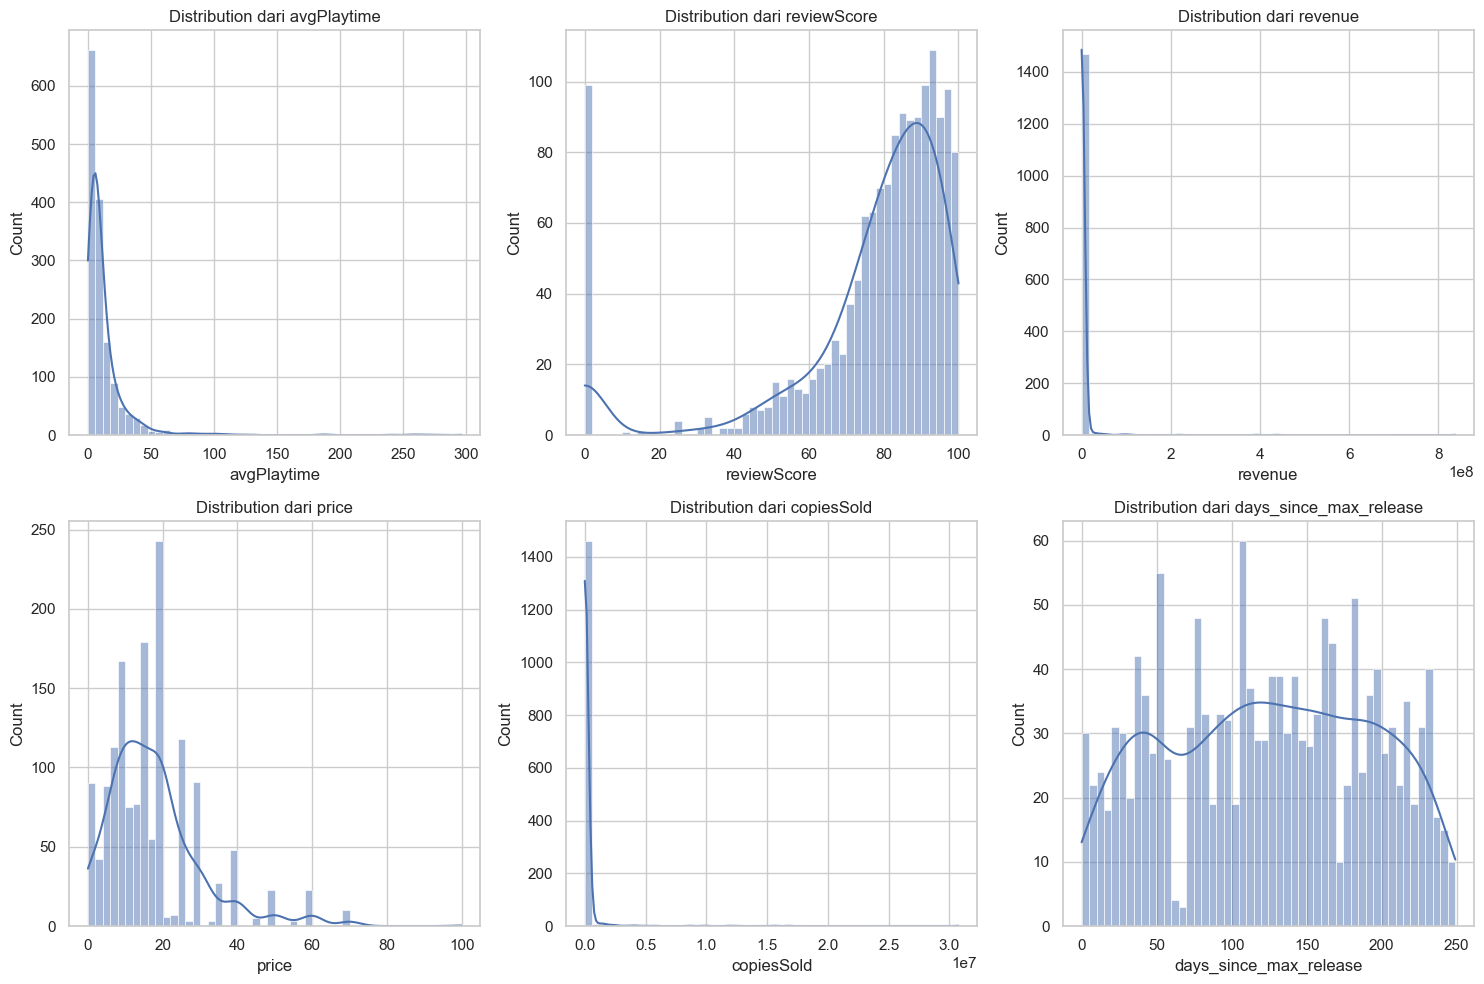

In [558]:
# Buat subplots 2 baris, 3 kolom
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot pertama - Distribusi avgPlaytime
sns.histplot(data=df_tmp, x='avgPlaytime', kde=True, bins=50, ax=axes[0, 0])
axes[0, 0].set_title('Distribution dari avgPlaytime')

# Plot kedua - Distribusi reviewScore
sns.histplot(data=df_tmp, x='reviewScore', kde=True, bins=50, ax=axes[0, 1])
axes[0, 1].set_title('Distribution dari reviewScore')

# Plot ketiga - Distribusi revenue
sns.histplot(data=df_tmp, x='revenue', kde=True, bins=50, ax=axes[0, 2])
axes[0, 2].set_title('Distribution dari revenue')

# Plot keempat - Distribusi price
sns.histplot(data=df_tmp, x='price', kde=True, bins=50, ax=axes[1, 0])
axes[1, 0].set_title('Distribution dari price')

# Plot kelima - Distribusi copiesSold
sns.histplot(data=df_tmp, x='copiesSold', kde=True, bins=50, ax=axes[1, 1])
axes[1, 1].set_title('Distribution dari copiesSold')

# Plot keenam - Distribusi days_since_max_release
sns.histplot(data=df_tmp, x='days_since_max_release', kde=True, bins=50, ax=axes[1, 2])
axes[1, 2].set_title('Distribution dari days_since_max_release')

# Menampilkan plot
plt.tight_layout()
plt.show()

## 5. Preprocessing Data

In [560]:
# cek data Numerik
for label, konten in df_tmp.items():
    if pd.api.types.is_numeric_dtype(konten):
        print(label)

copiesSold
price
revenue
avgPlaytime
reviewScore
days_since_max_release


In [561]:
# cek data objek
for label, konten in df_tmp.items():
    if pd.api.types.is_object_dtype(konten):
        print(label)

name
publisherClass
publishers
developers
is_new


### Convert data Objek menjadi Categorical

In [563]:
# convert data
for label, konten in df_tmp.items():
    if pd.api.types.is_object_dtype(konten):
        df_tmp[label] = konten.astype('category')

In [564]:
# cek tipe data sekarang
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   name                    1497 non-null   category
 1   copiesSold              1497 non-null   int64   
 2   price                   1497 non-null   float64 
 3   revenue                 1497 non-null   float64 
 4   avgPlaytime             1497 non-null   float64 
 5   reviewScore             1497 non-null   int64   
 6   publisherClass          1497 non-null   category
 7   publishers              1497 non-null   category
 8   developers              1497 non-null   category
 9   days_since_max_release  1497 non-null   int64   
 10  is_new                  1497 non-null   category
dtypes: category(5), float64(3), int64(3)
memory usage: 210.6 KB


### Convert data categorikal menjadi Numerik

In [566]:
import warnings

# Abaikan semua warning
warnings.simplefilter("ignore")

In [567]:
# convert data
for label, konten in df_tmp.items():
    if pd.api.types.is_categorical_dtype(konten):
        df_tmp[label] = pd.Categorical(konten).codes

In [568]:
# cek tipe data sekarang
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    1497 non-null   int16  
 1   copiesSold              1497 non-null   int64  
 2   price                   1497 non-null   float64
 3   revenue                 1497 non-null   float64
 4   avgPlaytime             1497 non-null   float64
 5   reviewScore             1497 non-null   int64  
 6   publisherClass          1497 non-null   int8   
 7   publishers              1497 non-null   int16  
 8   developers              1497 non-null   int16  
 9   days_since_max_release  1497 non-null   int64  
 10  is_new                  1497 non-null   int8   
dtypes: float64(3), int16(3), int64(3), int8(2)
memory usage: 82.0 KB


In [569]:
df_tmp.head()

,name,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,days_since_max_release,is_new
0,1082,26225,7.99,202048.0,7.407743,96,2,178,1071,249,1
1,786,7578,9.99,64494.0,4.364727,67,2,887,1065,248,1
2,43,20806,17.76,323316.0,1.366906,94,2,634,774,247,1
3,39,12475,2.99,28485.0,0.692439,89,2,1047,1273,246,1
4,1200,1888,14.99,25471.0,2.946588,100,2,929,1120,246,1


## Cek Outlier

In [571]:
col = df_tmp.columns
col

Index(['name', 'copiesSold', 'price', 'revenue', 'avgPlaytime', 'reviewScore',
       'publisherClass', 'publishers', 'developers', 'days_since_max_release',
       'is_new'],
      dtype='object')

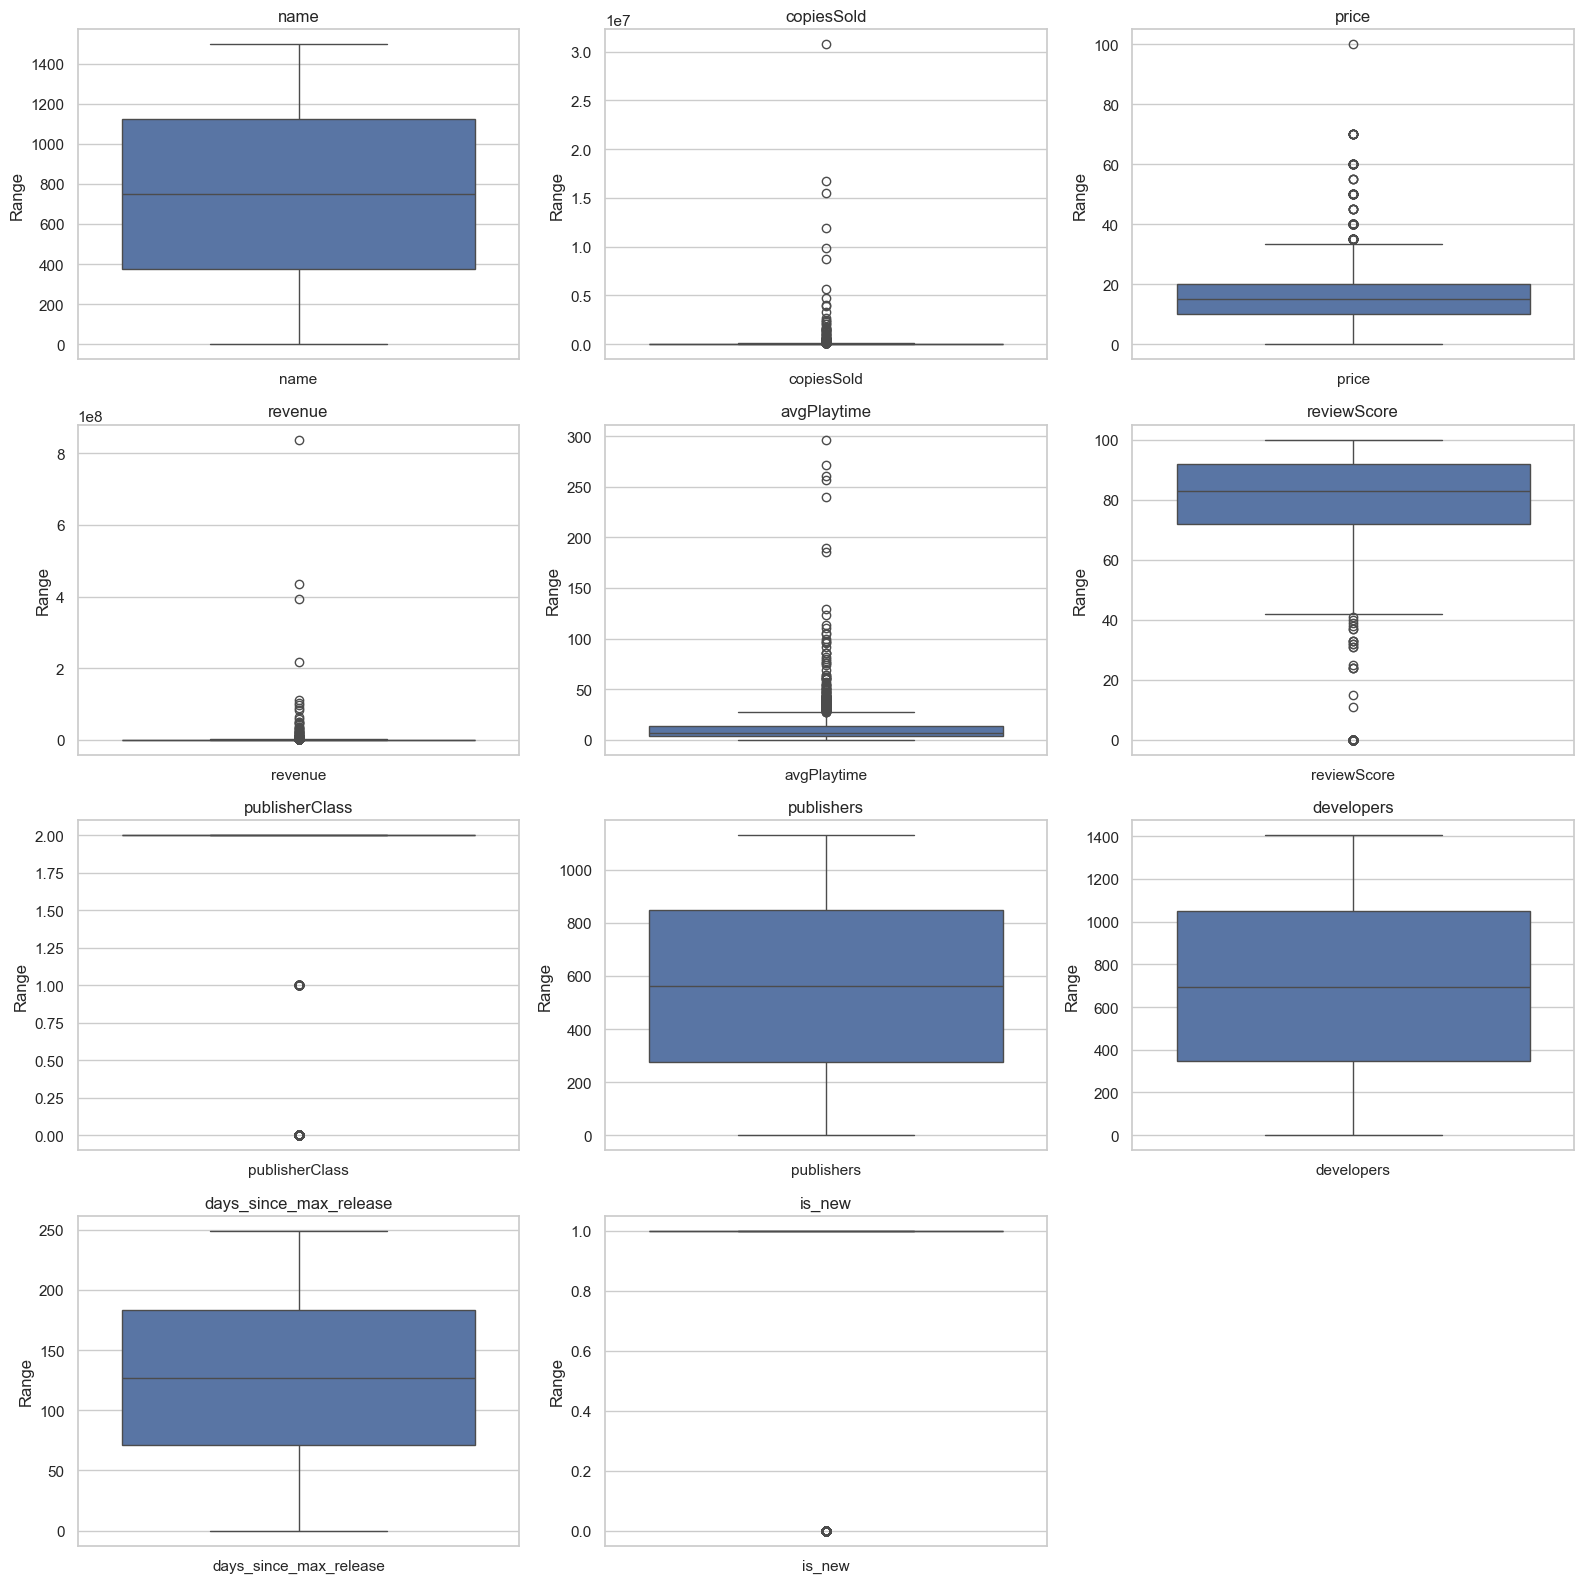

In [572]:
# Daftar kolom yang akan dicek outlier
attributes = col

# Data yang sudah dipilih
data_rmv = df_tmp[attributes]

# Ubah data_rmv menjadi format panjang menggunakan pd.melt
melted_data = pd.melt(data_rmv, var_name="Attributes", value_name="Range")

# Tentukan jumlah kolom dan baris untuk subplot
num_attributes = len(attributes)
cols = 3  # Misalnya, kita ingin 3 plot per baris
rows = (num_attributes + cols - 1) // cols  # Ini menggantikan math.ceil

# Buat subplots dengan ukuran yang sesuai
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))  # Adjusting height for better visibility
axes = axes.flatten()  # Flatten to easily iterate over

# Plot setiap atribut dalam subplot yang berbeda
for i, attribute in enumerate(attributes):
    sns.boxplot(x="Attributes", y="Range", data=melted_data[melted_data["Attributes"] == attribute], ax=axes[i])
    axes[i].set_title(f'{attribute}')
    axes[i].set_xlabel('')  # Remove x-axis label for clarity
    axes[i].set_ylabel('Range')

# Hapus subplot yang kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Atur tata letak agar tidak saling tumpang tindih
plt.tight_layout()
plt.show()

### Handling Outlier

In [574]:
# Fungsi untuk menghapus outliers berdasarkan IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5*IQR) & (df[column] <= Q3 + 1.5*IQR)]

In [575]:
col = df_tmp.columns
handle = ['name', 'copiesSold', 'price', 'revenue', 'avgPlaytime', 'reviewScore', 'publishers', 'developers', 'days_since_max_release']

In [576]:
import pandas as pd

# Definisikan kolom yang ingin ditangani
columns_to_handle = ['copiesSold', 'price', 'revenue', 'avgPlaytime', 'reviewScore', 'days_since_max_release']

# Fungsi untuk menangani outlier dengan IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Menggantikan outlier dengan NaN
        df[col] = df[col].mask((df[col] < lower_bound) | (df[col] > upper_bound))
    
    return df

# Menangani outlier
df_cleaned = remove_outliers_iqr(df_tmp.copy(), columns_to_handle)

# Mengisi NaN dengan nilai median untuk mempertahankan jumlah kolom
for col in columns_to_handle:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

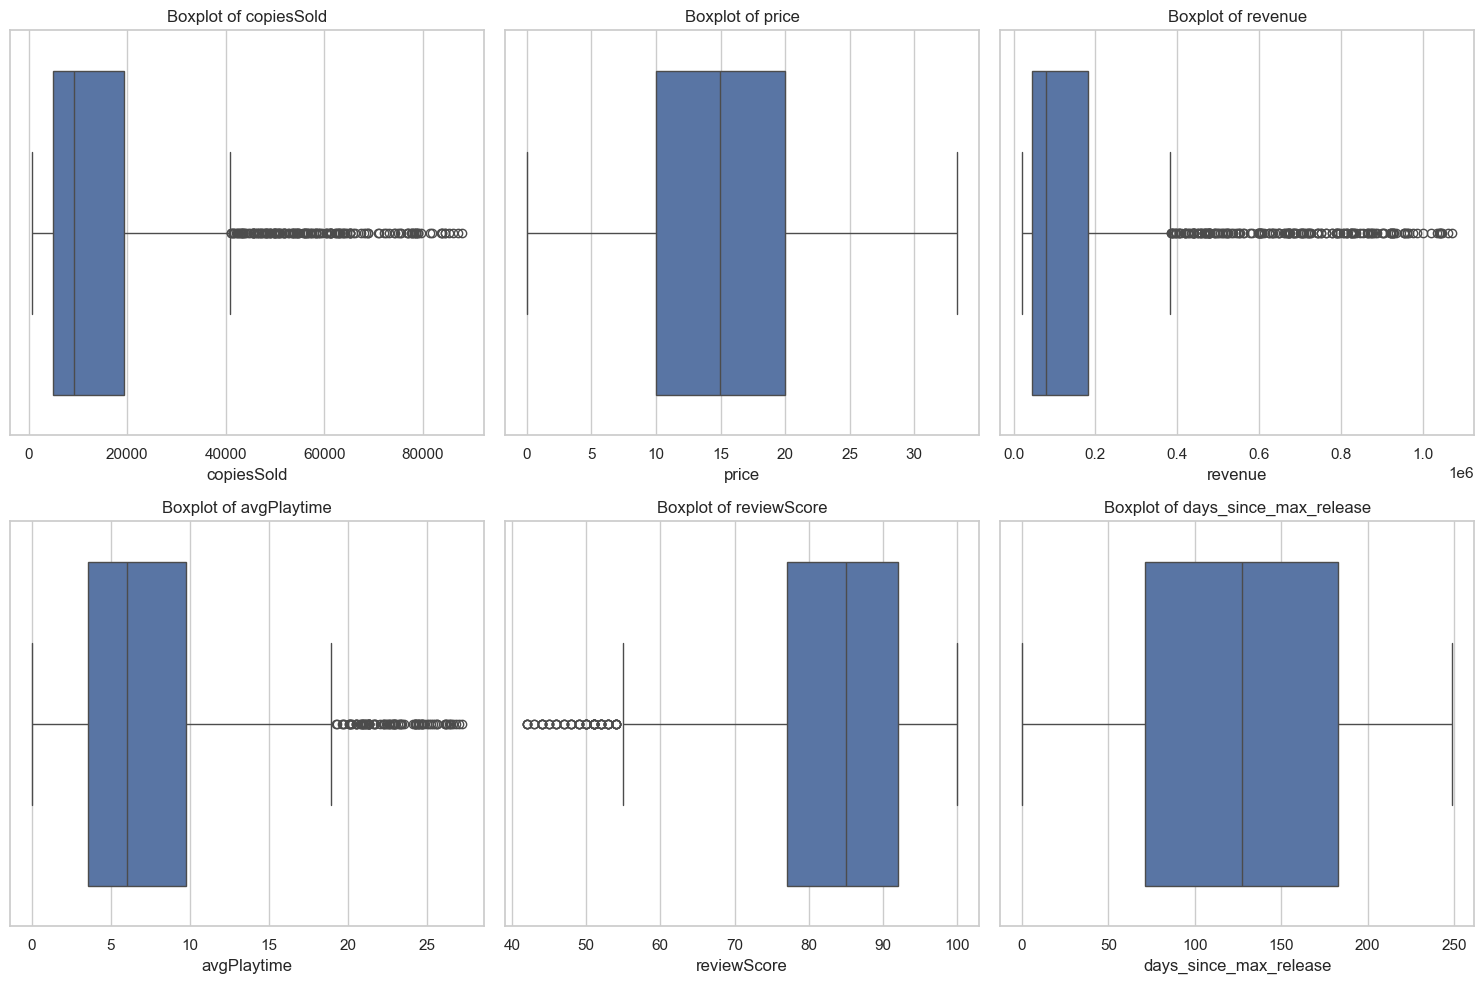

In [577]:
# Mengatur ukuran figure
plt.figure(figsize=(15, 10))

# Membuat boxplot untuk setiap kolom dalam columns_to_handle
for i, col in enumerate(columns_to_handle, 1):
    plt.subplot(2, 3, i)  # Mengatur layout 2 baris dan 3 kolom
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

# Menampilkan plot
plt.tight_layout()
plt.show()

## Lihat Corelation Matrix

In [579]:
len(df_tmp.columns), len(df_cleaned.columns)

(11, 11)

(11.5, -0.5)

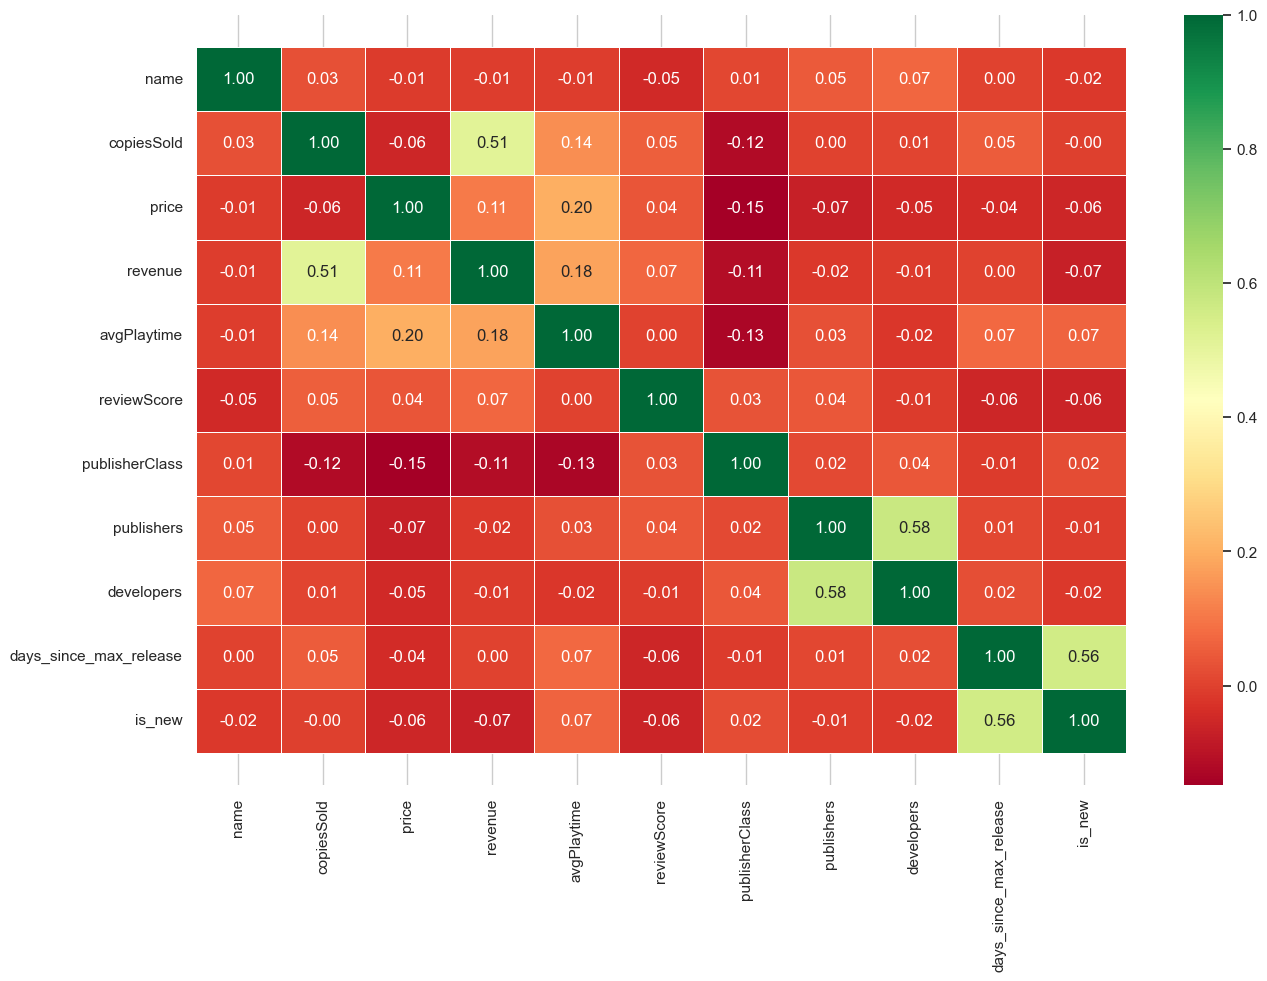

In [635]:
corr_matrix = df_cleaned.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="RdYlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [664]:
# List kolom yang dipertahankan
columns_to_keep = ['copiesSold', 'revenue', 'price', 'avgPlaytime']

# Memilih kolom yang dipertahankan
df_cluster_selected = df_cleaned[columns_to_keep]

# Menampilkan data yang sudah diseleksi
df_cluster_selected.head()

,copiesSold,revenue,price,avgPlaytime
0,26225.0,202048.0,7.99,7.407743
1,7578.0,64494.0,9.99,4.364727
2,20806.0,323316.0,17.76,1.366906
3,12475.0,28485.0,2.99,0.692439
4,1888.0,25471.0,14.99,2.946588


(4.5, -0.5)

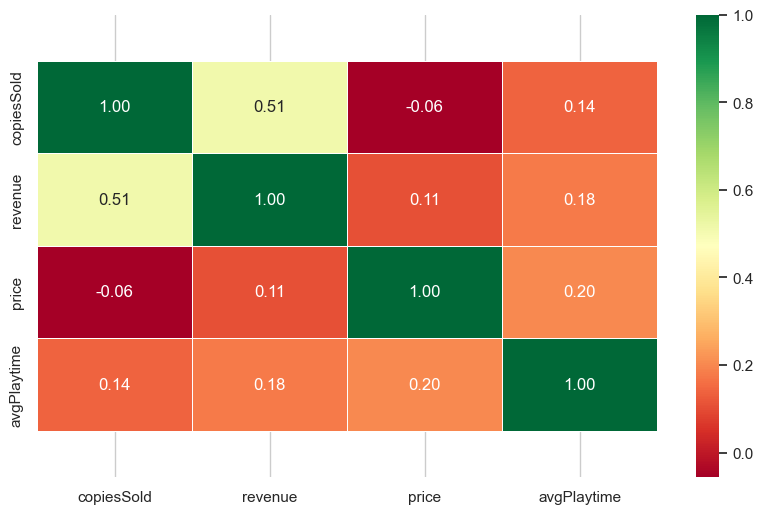

In [666]:
corr_matrix = df_cluster_selected.corr()
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="RdYlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Melakukan Scaling Data

In [669]:
df_fix = df_cluster_selected
df_fix.head()

,copiesSold,revenue,price,avgPlaytime
0,26225.0,202048.0,7.99,7.407743
1,7578.0,64494.0,9.99,4.364727
2,20806.0,323316.0,17.76,1.366906
3,12475.0,28485.0,2.99,0.692439
4,1888.0,25471.0,14.99,2.946588


In [671]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

mms = StandardScaler()
df_scaled = mms.fit_transform(df_fix)

In [673]:
columns = df_fix.columns
columns

Index(['copiesSold', 'revenue', 'price', 'avgPlaytime'], dtype='object')

In [675]:
data_scaled = pd.DataFrame(data=df_scaled, columns=columns)
data_scaled.head()

,copiesSold,revenue,price,avgPlaytime
0,0.585544,0.158446,-0.861513,-0.038880
1,-0.478340,-0.484456,-0.598265,-0.573296
2,0.276369,0.725230,0.424454,-1.099775
3,-0.198947,-0.652755,-1.519633,-1.218225
4,-0.802977,-0.666842,0.059855,-0.822350


In [677]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_trans = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=pca_trans, columns=['PCA1', 'PCA2'])
print("Explained variance ratio:", pca.explained_variance_ratio_)
df_pca.head()

Explained variance ratio: [0.40389141 0.28498078]


,PCA1,PCA2
0,0.291552,-0.918617
1,-0.948095,-0.486693
2,0.297083,-0.457499
3,-1.307844,-1.590887
4,-1.244035,0.036969


## 6. Modelling dan Evaluasi Model

### K - Means Clustering

In [681]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
scores = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, n_init=10, random_state=42)
    km.fit(df_pca)
    wcss.append(km.inertia_)

    labels = km.labels_
    silhouette_avg = silhouette_score(df_pca, labels)
    scores.append(silhouette_avg)
    
    # Format angka dengan dua desimal
    print(f'wcss score for n_clusters = {i} is {wcss[-1]:.2f}')
    print('='*60)
    print(f'silhouette score for n_clusters = {i} is {silhouette_avg:.2f}')


wcss score for n_clusters = 2 is 2388.28
silhouette score for n_clusters = 2 is 0.50
wcss score for n_clusters = 3 is 1466.48
silhouette score for n_clusters = 3 is 0.41
wcss score for n_clusters = 4 is 1166.40
silhouette score for n_clusters = 4 is 0.37
wcss score for n_clusters = 5 is 929.89
silhouette score for n_clusters = 5 is 0.38
wcss score for n_clusters = 6 is 764.54
silhouette score for n_clusters = 6 is 0.38
wcss score for n_clusters = 7 is 667.40
silhouette score for n_clusters = 7 is 0.39
wcss score for n_clusters = 8 is 580.65
silhouette score for n_clusters = 8 is 0.37
wcss score for n_clusters = 9 is 505.13
silhouette score for n_clusters = 9 is 0.38
wcss score for n_clusters = 10 is 457.00
silhouette score for n_clusters = 10 is 0.39


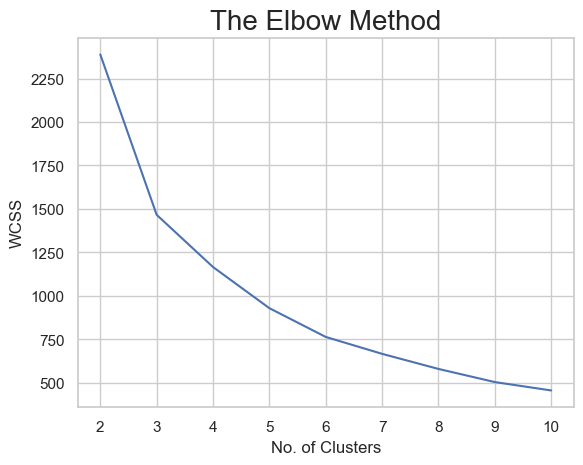

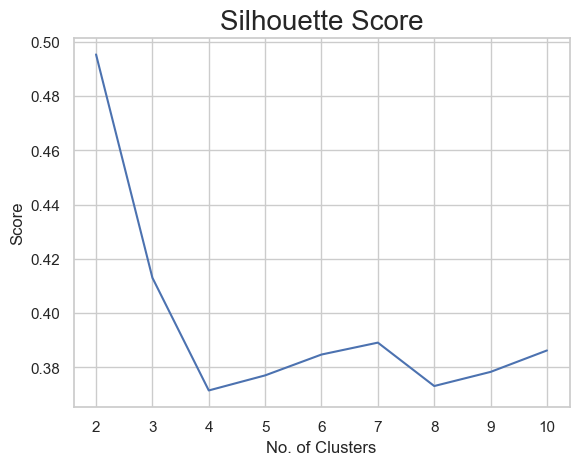

In [683]:
# Visualisasi Elbow Method
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

# Visualisasi Silhouette Score
plt.plot(range(2, 11), scores)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()

In [751]:
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(df_pca)
centroids = kmeans.cluster_centers_

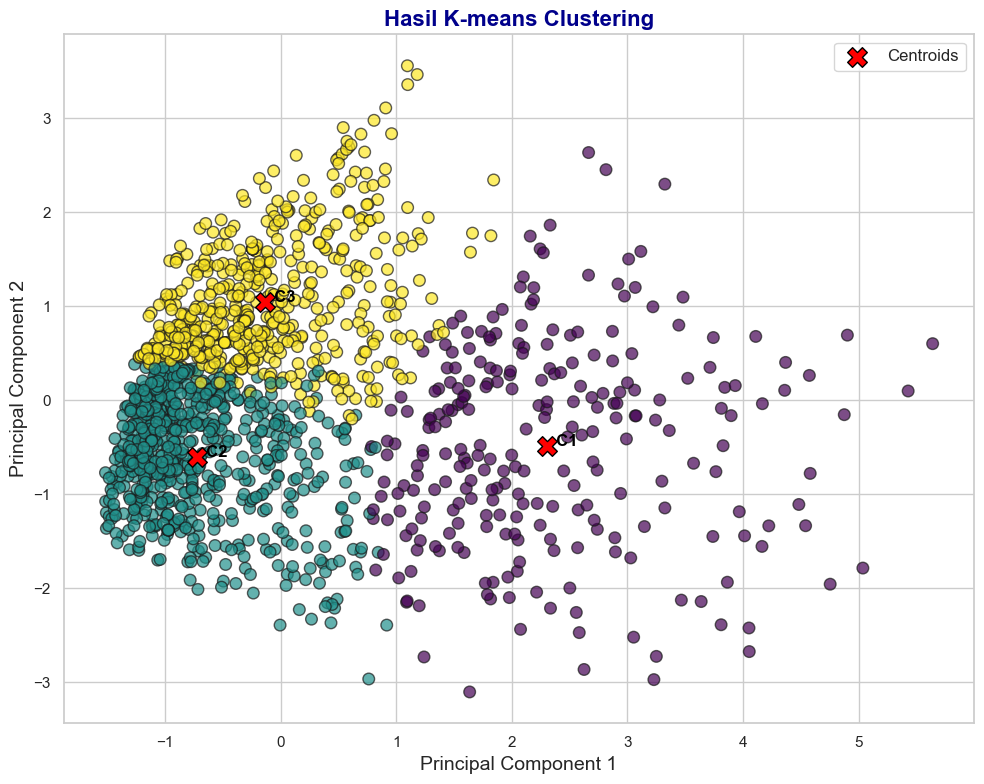

In [753]:
# Atur style seaborn agar lebih menarik
sns.set(style="whitegrid")

# Buat figure dengan ukuran yang lebih besar
plt.figure(figsize=(10, 8))

# Plot scatter points untuk setiap cluster, dengan ukuran dan transparansi yang sesuai
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], 
            c=cluster_labels, cmap='viridis', s=70, alpha=0.7, edgecolor='k')

# Plot cluster centroids dengan ukuran dan warna yang lebih mencolok
plt.scatter(centroids[:, 0], centroids[:, 1], 
            c='red', marker='X', label='Centroids', s=200, edgecolor='black')

# Anotasi centroids agar lebih informatif
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'  C{i+1}', color='black', fontsize=12, fontweight='bold')

# Tambahkan grid, title, dan labels
plt.title('Hasil K-means Clustering', fontsize=16, color='darkblue', fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

# Tampilkan legend
plt.legend(loc='best', fontsize=12)

# Tampilkan plot
plt.tight_layout()
plt.show()

In [755]:
df_cluster = df_cluster_selected
df_cluster.head()

,copiesSold,revenue,price,avgPlaytime,Cluster
0,26225.0,202048.0,7.99,7.407743,0
1,7578.0,64494.0,9.99,4.364727,0
2,20806.0,323316.0,17.76,1.366906,0
3,12475.0,28485.0,2.99,0.692439,0
4,1888.0,25471.0,14.99,2.946588,0


In [757]:
df_cluster['Cluster'] = cluster_labels
df_cluster.head()

,copiesSold,revenue,price,avgPlaytime,Cluster
0,26225.0,202048.0,7.99,7.407743,1
1,7578.0,64494.0,9.99,4.364727,1
2,20806.0,323316.0,17.76,1.366906,1
3,12475.0,28485.0,2.99,0.692439,1
4,1888.0,25471.0,14.99,2.946588,1


In [759]:
# Perbaiki kode untuk mendapatkan data dari cluster 1
cluster_1 = df_cluster[df_cluster['Cluster'] == 0]
cluster_2 = df_cluster[df_cluster['Cluster'] == 1]
cluster_3 = df_cluster[df_cluster['Cluster'] == 2]

In [761]:
# Gabungkan data dari setiap cluster secara berdampingan
display(cluster_1.head(), cluster_2.head(), cluster_3.head())


,copiesSold,revenue,price,avgPlaytime,Cluster
16,74350.0,284695.0,4.99,6.037239,0
18,28946.0,469651.0,19.99,5.517902,0
20,72044.0,78886.0,0.00,6.037239,0
23,40391.0,648123.0,18.99,8.180826,0
25,68442.0,927493.0,16.99,6.473381,0


,copiesSold,revenue,price,avgPlaytime,Cluster
0,26225.0,202048.0,7.99,7.407743,1
1,7578.0,64494.0,9.99,4.364727,1
2,20806.0,323316.0,17.76,1.366906,1
3,12475.0,28485.0,2.99,0.692439,1
4,1888.0,25471.0,14.99,2.946588,1


,copiesSold,revenue,price,avgPlaytime,Cluster
6,9298.0,78886.0,19.99,8.984005,2
9,2599.0,34137.0,15.99,6.327124,2
17,4922.0,88551.0,19.99,18.604326,2
27,11565.0,130913.0,14.99,11.398267,2
30,20643.0,217085.0,14.99,10.783586,2


In [786]:
# Hitung rata-rata dan standar deviasi dari setiap fitur dalam setiap cluster
cluster_summary = df_cluster.groupby('Cluster').agg('mean')

# Batasi jumlah angka di belakang koma menjadi dua
cluster_summary = cluster_summary.round(2)

# Menampilkan hasil
# display(cluster_summary)
cluster_summary

,copiesSold,revenue,price,avgPlaytime
Cluster,,,,
0,45322.23,510757.02,16.27,10.19
1,11474.32,86086.21,9.37,4.85
2,7850.90,113651.30,20.68,10.15


In [792]:
len(cluster_1), len(cluster_2), len(cluster_3)

(255, 714, 528)

In [790]:
cluster_3

,copiesSold,revenue,price,avgPlaytime,Cluster
6,9298.0,78886.0,19.99,8.984005,2
9,2599.0,34137.0,15.99,6.327124,2
17,4922.0,88551.0,19.99,18.604326,2
27,11565.0,130913.0,14.99,11.398267,2
30,20643.0,217085.0,14.99,10.783586,2
...,...,...,...,...,...
1476,48267.0,78886.0,29.99,4.726446,2
1477,9298.0,78886.0,29.99,9.389112,2
1490,2228.0,35271.0,19.99,2.058410,2
1493,1747.0,29857.0,18.99,10.641075,2


### Hasil Visualisasi 3 Dimensi

In [770]:
pca = PCA(n_components=3)
pca_trans = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=pca_trans, columns=['PCA1', 'PCA2', 'PCA3'])
print("Explained variance ratio:", pca.explained_variance_ratio_)
df_pca.head()

Explained variance ratio: [0.40389141 0.28498078 0.1951764 ]


,PCA1,PCA2,PCA3
0,0.291552,-0.918617,0.414333
1,-0.948095,-0.486693,0.052074
2,0.297083,-0.457499,-1.289510
3,-1.307844,-1.590887,0.131365
4,-1.244035,0.036969,-0.466470


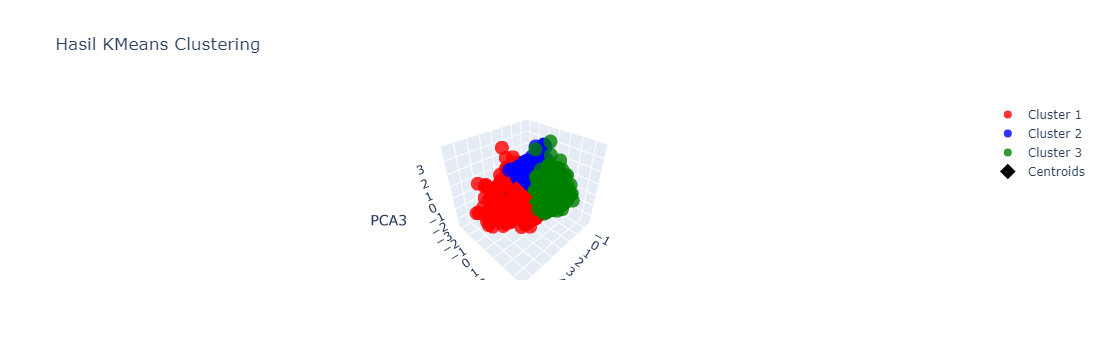

In [772]:
import plotly.graph_objects as go
from sklearn.cluster import KMeans

# Fitting KMeans
kmeansmodel = KMeans(n_clusters=3, random_state=42).fit(df_pca)
y_kmeans = kmeansmodel.labels_

# Scatter plot untuk Cluster 1
trace1 = go.Scatter3d(
    x=df_pca.iloc[y_kmeans == 0, 0],
    y=df_pca.iloc[y_kmeans == 0, 1],
    z=df_pca.iloc[y_kmeans == 0, 2],
    mode='markers',
    marker=dict(size=8, color='red', opacity=0.8),
    name='Cluster 1'
)

# Scatter plot untuk Cluster 2
trace2 = go.Scatter3d(
    x=df_pca.iloc[y_kmeans == 1, 0],
    y=df_pca.iloc[y_kmeans == 1, 1],
    z=df_pca.iloc[y_kmeans == 1, 2],
    mode='markers',
    marker=dict(size=8, color='blue', opacity=0.8),
    name='Cluster 2'
)

# Scatter plot untuk Cluster 3
trace3 = go.Scatter3d(
    x=df_pca.iloc[y_kmeans == 2, 0],
    y=df_pca.iloc[y_kmeans == 2, 1],
    z=df_pca.iloc[y_kmeans == 2, 2],
    mode='markers',
    marker=dict(size=8, color='green', opacity=0.8),
    name='Cluster 3'
)

# Scatter plot untuk menampilkan centroid dari K-Means
centroids = go.Scatter3d(
    x=kmeansmodel.cluster_centers_[:, 0],
    y=kmeansmodel.cluster_centers_[:, 1],
    z=kmeansmodel.cluster_centers_[:, 2],
    mode='markers',
    marker=dict(size=12, color='black', symbol='diamond', opacity=1),
    name='Centroids'
)

# Membuat layout
layout = go.Layout(
    title='Hasil KMeans Clustering',
    scene=dict(
        xaxis_title='PCA1',
        yaxis_title='PCA2',
        zaxis_title='PCA3'
    ),
    showlegend=True
)

# Menggabungkan semua trace
fig = go.Figure(data=[trace1, trace2, trace3, centroids], layout=layout)

# Menampilkan plot interaktif
fig.show()

### Hierarchical Clustering (Agglomerative Clustering)

In [774]:
from sklearn.cluster import AgglomerativeClustering

linkage_col = ['ward', 'complete', 'average', 'single']
scores_all = [[] for _ in range(len(linkage_col))]
for j in range (len(linkage_col)):
    print('Linkage: ', linkage_col[j])
    scores = []
    for i in range(2, 10):
        AC = AgglomerativeClustering(n_clusters=i, linkage = linkage_col[j]) # Menggunakan Ward Method
        AC.fit(df_pca)
        
        labels = AC.labels_
        silhouette_avg = silhouette_score(df_pca, labels)
        scores.append(silhouette_avg)
        print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))
    print("\=======================================================\n")
    scores_all[j] = scores

Linkage:  ward
silhoutte score for n_clusters = 2 is 0.4030661413566449
silhoutte score for n_clusters = 3 is 0.3170985345528741
silhoutte score for n_clusters = 4 is 0.25703819742074596
silhoutte score for n_clusters = 5 is 0.2610209595921965
silhoutte score for n_clusters = 6 is 0.23657802807705425
silhoutte score for n_clusters = 7 is 0.2449053137834084
silhoutte score for n_clusters = 8 is 0.25102586748714156
silhoutte score for n_clusters = 9 is 0.2599391662513285
\=======================================================

Linkage:  complete
silhoutte score for n_clusters = 2 is 0.4332121319220253
silhoutte score for n_clusters = 3 is 0.3986853346192416
silhoutte score for n_clusters = 4 is 0.3698222557046932
silhoutte score for n_clusters = 5 is 0.3381396174328788
silhoutte score for n_clusters = 6 is 0.2749854891483938
silhoutte score for n_clusters = 7 is 0.26828757441039625
silhoutte score for n_clusters = 8 is 0.2661808692002066
silhoutte score for n_clusters = 9 is 0.268342317

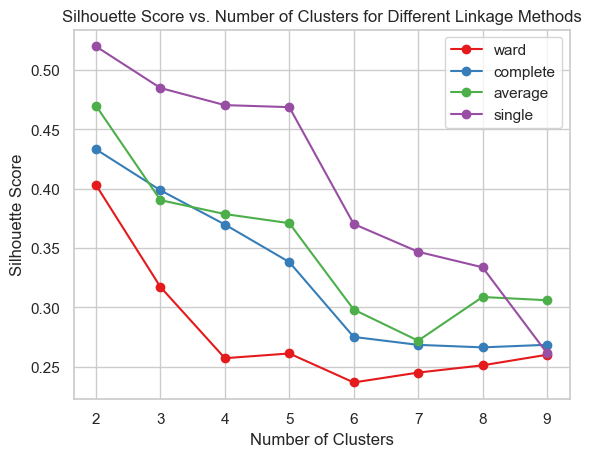

In [775]:
colors = sns.color_palette("Set1", len(linkage_col))

for j in range(len(linkage_col)):
    plt.plot(range(2, 10), scores_all[j], marker='o', color=colors[j], label=linkage_col[j])

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters for Different Linkage Methods')
plt.legend()
plt.grid(True)
plt.show()

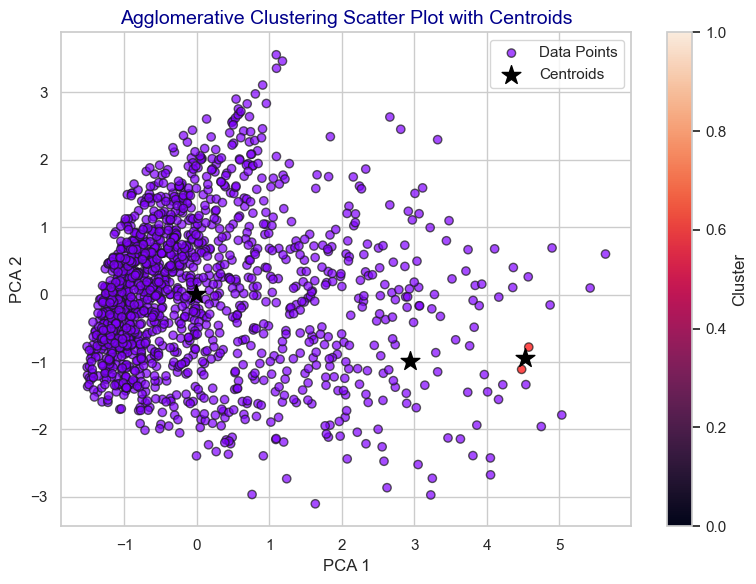

In [777]:
# Agglomerative Clustering
n_cluster = 3
AC = AgglomerativeClustering(n_clusters=n_cluster, linkage='single')
labels = AC.fit_predict(df_pca)

# Gabungkan df_pca dengan label clustering
df_train_with_labels = np.column_stack((df_pca.values, labels))  # Gunakan .values jika df_pca adalah DataFrame

# Hitung centroids untuk setiap cluster
centroids = []
for cluster_label in range(n_cluster):
    cluster_data = df_train_with_labels[df_train_with_labels[:, -1] == cluster_label]
    cluster_centroid = np.mean(cluster_data[:, :-1], axis=0)
    centroids.append(cluster_centroid)

centroids = np.array(centroids)

# Plotting
plt.figure(figsize=(8, 6))

# Akses kolom dari df_pca dengan .iloc jika df_pca adalah DataFrame
x = df_pca.iloc[:, 0]
y = df_pca.iloc[:, 1]

# Scatter plot untuk data points dan centroids
plt.scatter(x, y, c=labels, cmap='rainbow', label='Data Points', alpha=0.7, edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='*', s=200, label='Centroids')

# Pengaturan tampilan
plt.title('Agglomerative Clustering Scatter Plot with Centroids', fontsize=14, color='darkblue')
plt.xlabel('PCA 1', fontsize=12)
plt.ylabel('PCA 2', fontsize=12)
plt.colorbar(label='Cluster')
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()


In [778]:
import scipy.cluster.hierarchy as sch

linked = sch.linkage(df_pca, 'ward')

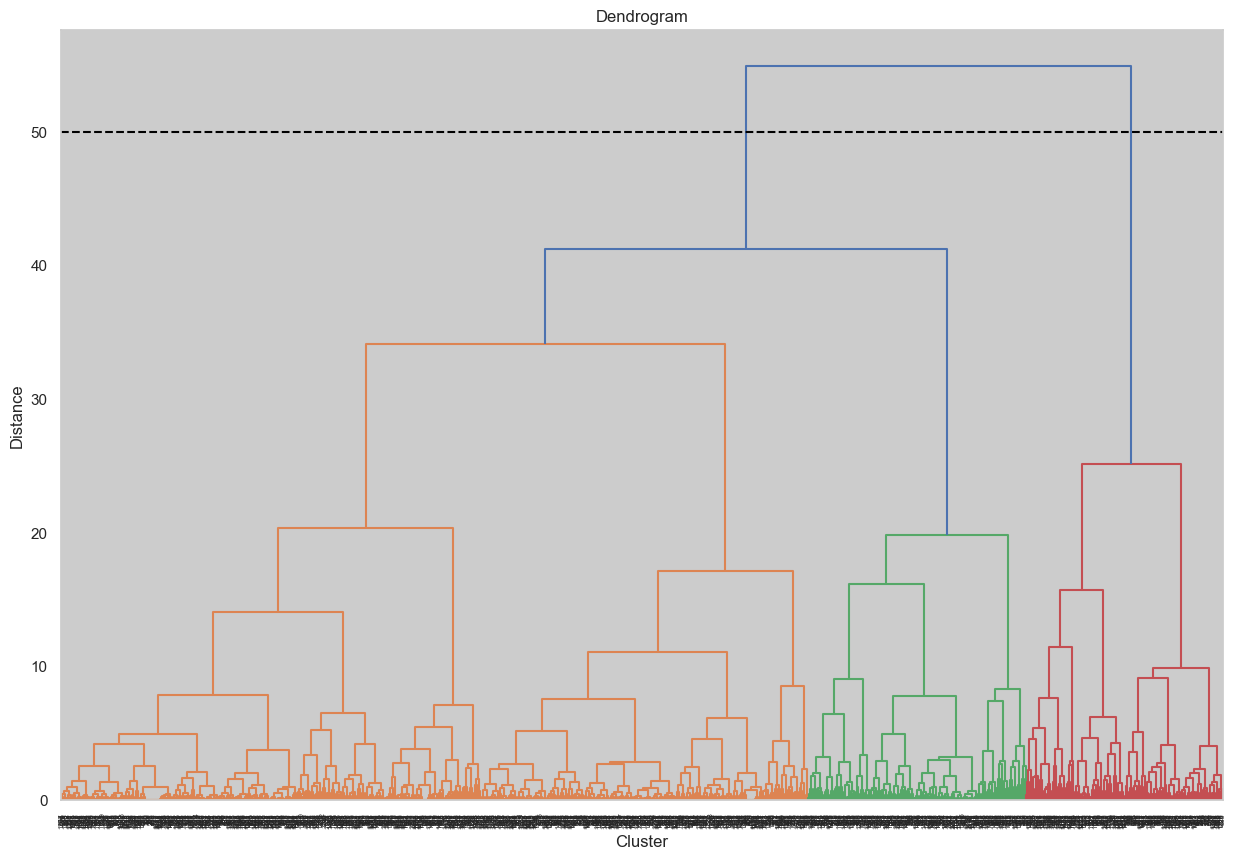

In [779]:
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(linked, orientation='top',distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Cluster')
plt.ylabel('Distance')
plt.axhline(y=50, color='black', linestyle='--') # at this point, will divide the data into 2 clusters
plt.show()

# Terimakasih ^^